# 线性回归


## 第一部分：线性回归的基本概念

### 1.1 什么是线性回归？

**线性回归（Linear Regression）** 是机器学习中最基础、最重要的算法之一。它可以追溯到 19 世纪初，是回归分析中最简单且最流行的方法。

#### 专有名词解释

##### 1. 回归（Regression）

- **定义**：回归是能为一个或多个自变量与因变量之间关系建模的一类方法
- **通俗理解**：就像在找一条线来"拟合"数据点，预测连续的数值
- **举例**：根据房屋面积预测房价、根据广告投入预测销量等

##### 2. 自变量和因变量

- **自变量（特征/输入）**：用来预测的变量，记作 **x**
  - 例如：房屋面积、房龄等
- **因变量（标签/输出）**：要预测的目标变量，记作 **y**
  - 例如：房价

##### 3. 样本和数据集

- **样本（Sample）**：一条完整的数据记录
  - 例如：一套房子的信息（面积 100㎡，房龄 5 年，价格 50 万）
- **训练数据集（Training Dataset）**：用来训练模型的数据集合
- **特征维度（Feature Dimensionality）**：输入特征的个数
  - 例如：如果只用面积预测房价，特征维度是 1；如果用面积和房龄，特征维度是 2

#### 线性回归的基本假设

线性回归基于一个核心假设：**自变量和因变量之间存在线性关系**


### 1.2 线性模型的数学表示

#### 基本形式（以房价预测为例）

假设我们要根据房屋的面积和房龄来预测房价，线性模型可以表示为：

**房价 = w₁ × 面积 + w₂ × 房龄 + b**

用数学符号表示：

$$\hat{y} = w_1x_1 + w_2x_2 + b$$

#### 重要概念解释

##### 1. 权重（Weight）- w

- **定义**：决定每个特征对预测值影响程度的参数
- **w₁**：面积的权重，表示面积每增加 1 单位，房价增加 w₁ 单位
- **w₂**：房龄的权重，表示房龄每增加 1 单位，房价增加 w₂ 单位
- **举例**：如果 w₁=2000，表示房屋面积每增加 1㎡，房价增加 2000 元

##### 2. 偏置（Bias/截距）- b

- **定义**：当所有特征都为 0 时的预测值
- **作用**：提供模型的基础值，增强模型的表达能力
- **举例**：即使房屋面积为 0，仍有一个基础价格 b

##### 3. 预测值 - ŷ（读作"y hat"）

- **定义**：模型给出的预测结果
- **符号说明**："帽子"符号表示这是估计值，不是真实值

#### 通用数学形式

对于 d 个特征的情况，线性模型可以写成：

**标量形式**：

$$\hat{y} = w_1x_1 + w_2x_2 + \ldots + w_dx_d + b$$

**向量形式**：

$$\hat{y} = \mathbf{w}^T\mathbf{x} + b$$

其中：

- $\mathbf{w} = [w_1, w_2, \ldots, w_d]^T$ 是权重向量
- $\mathbf{x} = [x_1, x_2, \ldots, x_d]^T$ 是特征向量
- $\mathbf{w}^T\mathbf{x}$ 表示向量内积（点积）


In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l
import random
import matplotlib.pyplot as plt

In [2]:
# 配置matplotlib支持中文显示
plt.rcParams["font.sans-serif"] = [
    "SimHei",
    "Microsoft YaHei",
    "DejaVu Sans",
]  # 指定默认字体
plt.rcParams["axes.unicode_minus"] = False  # 解决保存图像时负号'-'显示为方块的问题

In [3]:
# 线性回归的直观理解 - 简单例子
# 创建一个简单的一维线性回归示例

# 生成示例数据：房屋面积 vs 房价
np.random.seed(42)
areas = np.linspace(50, 200, 50)  # 房屋面积从50到200平米
true_price = 2.5 * areas + 10 + np.random.normal(0, 15, 50)  # 真实关系 + 噪声

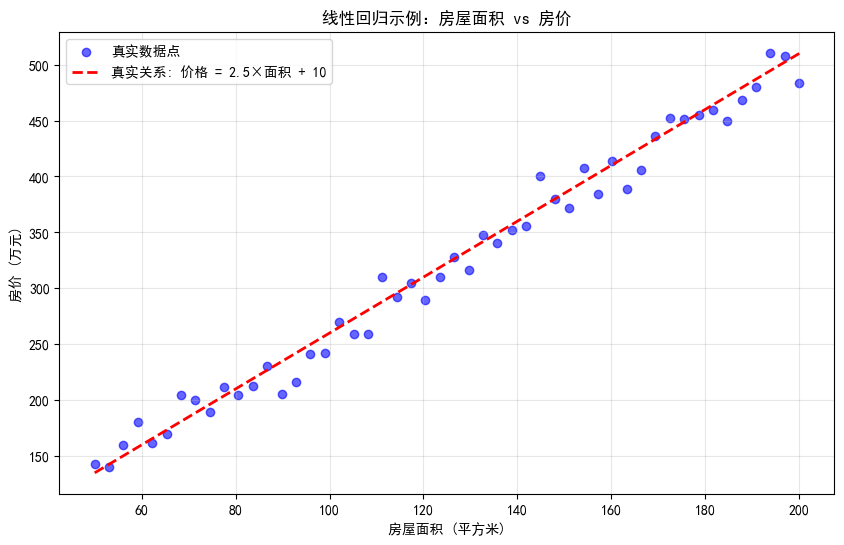

观察要点：
1. 蓝色点是实际观测到的数据，有一定的随机性
2. 红色虚线是真实的线性关系
3. 线性回归的目标就是从蓝色点中找出红色线（或接近的线）
4. 公式 '价格 = 2.5×面积 + 10' 中：
   - 2.5 是权重(w)，表示面积每增加1平米，价格增加2.5万元
   - 10 是偏置(b)，表示基础价格


In [4]:
# 绘制数据点
plt.figure(figsize=(10, 6))
plt.scatter(areas, true_price, alpha=0.6, color="blue", label="真实数据点")

# 绘制真实的线性关系（无噪声）
true_line = 2.5 * areas + 10
plt.plot(areas, true_line, "r--", linewidth=2, label="真实关系: 价格 = 2.5×面积 + 10")

plt.xlabel("房屋面积 (平方米)")
plt.ylabel("房价 (万元)")
plt.title("线性回归示例：房屋面积 vs 房价")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("观察要点：")
print("1. 蓝色点是实际观测到的数据，有一定的随机性")
print("2. 红色虚线是真实的线性关系")
print("3. 线性回归的目标就是从蓝色点中找出红色线（或接近的线）")
print("4. 公式 '价格 = 2.5×面积 + 10' 中：")
print("   - 2.5 是权重(w)，表示面积每增加1平米，价格增加2.5万元")
print("   - 10 是偏置(b)，表示基础价格")

### 1.3 损失函数（Loss Function）

#### 什么是损失函数？

**损失函数**是衡量模型预测值与真实值之间差距的函数。它告诉我们模型的预测有多"糟糕"。

#### 专有名词解释

##### 1. 损失（Loss）

- **定义**：单个样本预测值与真实值之间的差距
- **目标**：**损失越小，预测越准确**

##### 2. 均方误差损失（Mean Square Error, MSE）

线性回归最常用的损失函数：

**单个样本的损失**：

$$ \text{Square Loss} = 0.5 \cdot (y - \hat{y})^2 $$

**整个数据集的损失**：

$$ \text{MSE} = \frac{1}{n} \sum\_{i=1}^{n} 0.5 \cdot (y_i - \hat{y}\_i)^2 $$

其中 $ n $ 是样本数量，$ y_i $ 是第 $ i $ 个样本的真实值，$ \hat{y}\_i $ 是对应的预测值。

#### 为什么使用平方误差？

1. **数学性质好**：可微分，便于优化
2. **惩罚大误差**：平方操作使得大误差受到更严重的惩罚
3. **统计学基础**：假设噪声服从正态分布时，最小化平方误差等价于最大似然估计

#### 损失函数的直观理解

- **预测完全正确**：ŷ = y，损失 = 0
- **预测偏差 1 单位**：|ŷ - y| = 1，损失 = 0.5
- **预测偏差 2 单位**：|ŷ - y| = 2，损失 = 2
- **预测偏差 3 单位**：|ŷ - y| = 3，损失 = 4.5

可以看出，误差越大，损失增长越快，这激励模型尽量减少大的预测误差。


In [5]:
# 损失函数可视化
# 演示不同预测误差对应的损失值
# 生成从-5到5的100个等间距数值，用于后续计算损失函数
errors = np.linspace(-5, 5, 100)

# 计算平方损失函数值，用于评估预测值与真实值之间的误差
square_loss = 0.5 * errors**2

# 计算绝对值损失函数值，同样用于评估预测值与真实值之间的误差
abs_loss = np.abs(errors)

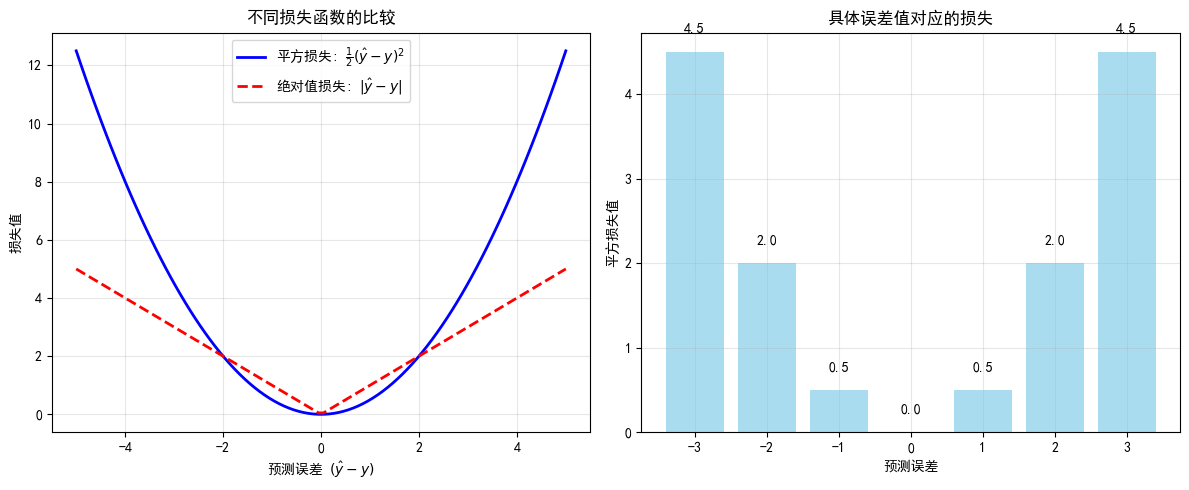

损失函数特点总结：
1. 平方损失在误差为0时达到最小值0
2. 平方损失对大误差的惩罚比绝对值损失更严重
3. 这种特性使模型更关注那些预测很不准确的样本


In [6]:
# 创建一个新的图形对象，设置图形大小为12x5英寸，为后续绘制损失函数图像做准备
plt.figure(figsize=(12, 5))

# 子图1：平方损失 vs 绝对值损失
plt.subplot(1, 2, 1)
plt.plot(
    errors,
    square_loss,
    "b-",
    linewidth=2,
    label=r"平方损失: $\frac{1}{2}(\hat{y}-y)^2$",
)
plt.plot(errors, abs_loss, "r--", linewidth=2, label=r"绝对值损失: $|\hat{y}-y|$")
plt.xlabel(r"预测误差 $(\hat{y} - y)$")
plt.ylabel("损失值")
plt.title("不同损失函数的比较")
plt.legend()
plt.grid(True, alpha=0.3)

# 子图2：损失函数的具体数值示例
plt.subplot(1, 2, 2)
example_errors = [-3, -2, -1, 0, 1, 2, 3]
example_losses = [0.5 * e**2 for e in example_errors]

plt.bar(range(len(example_errors)), example_losses, alpha=0.7, color="skyblue")
plt.xlabel("预测误差")
plt.ylabel("平方损失值")
plt.title("具体误差值对应的损失")
plt.xticks(range(len(example_errors)), example_errors)

# 在柱状图上标注数值
for i, (error, loss) in enumerate(zip(example_errors, example_losses)):
    plt.text(i, loss + 0.2, f"{loss:.1f}", ha="center", va="bottom")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("损失函数特点总结：")
print("1. 平方损失在误差为0时达到最小值0")
print("2. 平方损失对大误差的惩罚比绝对值损失更严重")
print("3. 这种特性使模型更关注那些预测很不准确的样本")

### 1.4 优化算法：梯度下降

#### 模型训练的目标

我们的目标是找到最佳的权重 w 和偏置 b，使得损失函数最小：

$$w^*, b^* = \arg\min L(w, b)$$

#### 什么是梯度下降？

**梯度下降（Gradient Descent）** 是一种寻找函数最小值的优化算法。

##### 核心思想

想象你在山坡上，想要下到山谷的最低点：

1. **梯度**：告诉你山坡最陡的上升方向
2. **负梯度**：指向最陡的下降方向
3. **梯度下降**：沿着负梯度方向移动，逐步接近最低点

#### 专有名词解释

##### 1. 梯度（Gradient）

- **定义**：函数在某点处的导数（多维情况下是偏导数向量）
- **物理意义**：函数值增长最快的方向和速度
- **记号**：$\nabla L(w,b)$ 或 $\frac{\partial L}{\partial w}, \frac{\partial L}{\partial b}$

##### 2. 学习率（Learning Rate）- η

- **定义**：控制每次参数更新步长的超参数
- **作用**：决定向最优解移动的快慢
- **典型值**：0.001, 0.01, 0.1 等

##### 3. 小批量随机梯度下降（Mini-batch SGD）

- **批量大小（Batch Size）**：每次用来计算梯度的样本数量
- **优势**：比使用全部数据更高效，比单样本更稳定

#### 梯度下降的更新公式

对于小批量随机梯度下降，更新公式为：

$$w \leftarrow w - \eta \times \frac{1}{B} \times \frac{\partial L}{\partial w}$$

$$b \leftarrow b - \eta \times \frac{1}{B} \times \frac{\partial L}{\partial b}$$

其中：

- $\eta$ 是学习率
- $B$ 是批量大小（batch size）
- $\frac{1}{B}$ 用于对梯度进行归一化，确保不同批量大小下的训练稳定性

#### 为什么要除以批量大小？

1. **梯度归一化**：避免因批量大小不同导致的梯度幅度差异
2. **训练稳定性**：保证不同批量大小下的学习行为一致
3. **数值稳定**：防止大批量导致的梯度爆炸

#### 算法步骤

1. **随机初始化**参数 w 和 b
2. **重复以下步骤直到收敛**：
   - 计算当前小批量的损失和梯度
   - 根据梯度更新公式更新参数
   - 检查是否达到停止条件


In [7]:
# 梯度下降可视化演示
# 使用简单的二次函数来演示梯度下降过程


def simple_loss(w):
    """简单的损失函数：L(w) = (w - 2)²"""
    return (w - 2) ** 2


def gradient(w):
    """损失函数的梯度：dL/dw = 2(w - 2)"""
    return 2 * (w - 2)


# 梯度下降演示
w_start = -1.0  # 起始点
learning_rate = 0.3  # 学习率
num_steps = 10  # 迭代步数

# 记录优化过程
w_history = [w_start]
loss_history = [simple_loss(w_start)]

w = w_start
for step in range(num_steps):
    # 计算梯度
    grad = gradient(w)
    # 更新参数
    w = w - learning_rate * grad
    # 记录历史
    w_history.append(w)
    loss_history.append(simple_loss(w))

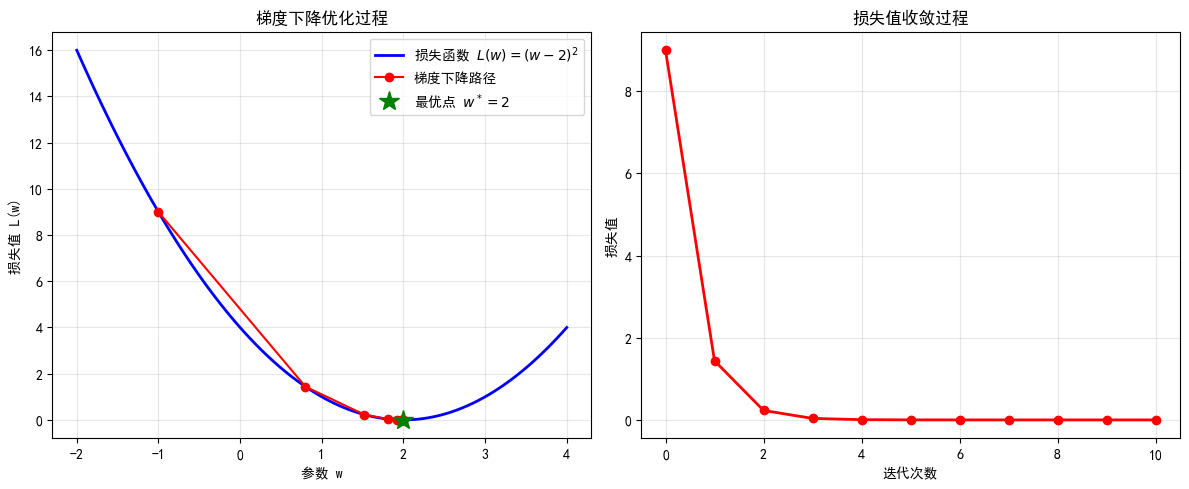

优化过程：
起始参数: w = -1.0
最终参数: w = 1.9997
目标参数: w = 2.0000
起始损失: 9.0000
最终损失: 0.000000

学习率 = 0.3，经过 10 次迭代基本收敛到最优解


In [8]:
# 绘制结果
plt.figure(figsize=(12, 5))

# 子图1：损失函数和优化路径
plt.subplot(1, 2, 1)
w_range = np.linspace(-2, 4, 100)
loss_range = simple_loss(w_range)

plt.plot(w_range, loss_range, "b-", linewidth=2, label=r"损失函数 $L(w)=(w-2)^2$")
plt.plot(w_history, loss_history, "ro-", markersize=6, label="梯度下降路径")
plt.plot(2, 0, "g*", markersize=15, label=r"最优点 $w^*=2$")

plt.xlabel("参数 w")
plt.ylabel("损失值 L(w)")
plt.title("梯度下降优化过程")
plt.legend()
plt.grid(True, alpha=0.3)

# 子图2：损失值随迭代次数的变化
plt.subplot(1, 2, 2)
plt.plot(range(len(loss_history)), loss_history, "o-", color="red", linewidth=2)
plt.xlabel("迭代次数")
plt.ylabel("损失值")
plt.title("损失值收敛过程")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"优化过程：")
print(f"起始参数: w = {w_start}")
print(f"最终参数: w = {w_history[-1]:.4f}")
print(f"目标参数: w = 2.0000")
print(f"起始损失: {loss_history[0]:.4f}")
print(f"最终损失: {loss_history[-1]:.6f}")
print(f"\n学习率 = {learning_rate}，经过 {num_steps} 次迭代基本收敛到最优解")

## 第二部分：线性回归的从零开始实现

在这一部分，我们将完全手动实现线性回归的所有组件，包括：

1. **数据生成**：创建人工数据集
2. **数据读取**：实现小批量数据迭代器
3. **模型定义**：实现线性模型
4. **损失函数**：实现均方误差损失
5. **优化算法**：实现随机梯度下降
6. **训练循环**：完整的模型训练过程

### 2.1 生成数据集

我们将生成一个人工数据集来演示线性回归。这样做的好处是我们知道真实的参数，可以验证算法是否正确。


In [9]:
def synthetic_data(w, b, num_examples):  # @save
    """生成y=Xw+b+噪声"""
    # 生成均值为0，标准差为1的随机数作为特征X，形状为(num_examples, len(w))
    X = torch.normal(0, 1, (num_examples, len(w)))
    # 通过矩阵乘法计算y，并加上偏置b
    y = torch.matmul(X, w) + b
    # 给y添加一些噪声，使其更加逼真
    y += torch.normal(0, 0.01, y.shape)
    # 返回特征X和标签y，y被重塑为(-1, 1)的形式
    return X, y.reshape((-1, 1))


# 核心代码：生成训练数据
# 真实权重
true_w = torch.tensor([2, -3.4])
# 真实偏置
true_b = 4.2
# 使用synthetic_data函数生成训练数据
features, labels = synthetic_data(true_w, true_b, 1000)

In [10]:
print("features:", features[0], "\nlabel:", labels[0])

features: tensor([-0.9567, -0.4781]) 
label: tensor([3.9226])


#### 输出解释

**输出含义：**

- **`features: tensor([x1, x2])`**：

  - 这是第一个样本的特征向量，包含两个特征值
  - `x₁`：第一个特征（可以理解为标准化后的"房屋面积"）
  - `x₂`：第二个特征（可以理解为标准化后的"房龄"）
  - 这些值是从标准正态分布 N(0,1) 中随机采样的，**每次运行数值会不同**

- **`label: tensor([y_value])`**：
  - 这是对应的标签值（目标值）
  - 通过线性关系计算：y = w₁×x₁ + w₂×x₂ + b + 噪声
  - **具体计算：2×x₁ + (-3.4)×x₂ + 4.2 + 噪声**

**关键点：**

- **每次运行结果都会不同**，因为使用了随机生成
- 这展示了一个完整的训练样本：输入特征 → 输出标签
- 数值变化不影响理解数据结构和计算方式


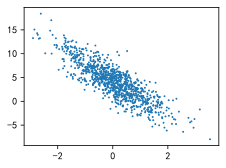

In [11]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

#### 输出解释

**散点图分析：**

这个散点图展示了数据集的特征与标签之间的关系：

##### 图形要素：

- **横轴（X 轴）**：`features[:, 1]` - 所有样本的第二个特征 x₂
- **纵轴（Y 轴）**：`labels` - 所有样本的标签值 y
- **每个点**：代表一个训练样本，坐标为 (x₂, y)

##### 观察要点：

1. **线性趋势**：

   - 可以观察到明显的**负线性关系**
   - 当 x₂ 增大时，y 值减小
   - 这符合我们设定的权重 w₂ = -3.4（负值）

2. **数据分布特征**：

   - 点围绕一条直线分布
   - 有轻微的散射，这是由添加的噪声造成的
   - 数据覆盖范围通常在 x₂ ∈ [-3, 3]，y 值会根据线性关系变化

3. **验证线性关系**：

   - 真实关系：y = 2×x₁ + (-3.4)×x₂ + 4.2 + 噪声
   - 由于我们只画 x₂ vs y，看到的是在 x₁ 影响下的投影
   - 负斜率验证了 w₂ = -3.4 的设定

4. **数据质量**：
   - 数据点分布均匀，没有明显的异常值
   - 噪声水平适中（标准差=0.01），不会掩盖主要的线性趋势
   - **注意：每次运行图形会略有不同，但整体模式保持一致**


### 2.2 读取数据集

在训练过程中，我们需要遍历数据集并提取小批量样本。这里我们实现一个数据迭代器。

#### 为什么要使用小批量？

1. **内存效率**：不需要一次性加载所有数据到内存
2. **计算效率**：可以利用 GPU 并行计算
3. **收敛性能**：小批量梯度下降往往比全批量收敛更快
4. **泛化能力**：随机性有助于跳出局部最优解


In [12]:
def data_iter(batch_size, features, labels):
    """
    小批量数据迭代器

    参数：
    batch_size: 批量大小
    features: 特征矩阵
    labels: 标签向量

    功能：
    每次返回batch_size个随机样本
    """
    num_examples = len(features)
    indices = list(range(num_examples))

    # 随机打乱样本顺序，这是随机梯度下降的关键
    random.shuffle(indices)

    # 生成小批量数据
    for i in range(0, num_examples, batch_size):
        # 获取当前批次的索引
        batch_indices = torch.tensor(indices[i : min(i + batch_size, num_examples)])
        # 返回当前批次的特征和标签
        yield features[batch_indices], labels[batch_indices]

In [13]:
# 定义批次大小，一次处理的样本数量
batch_size = 10

# 使用data_iter函数迭代数据集，每次迭代获取一个批次的数据
# 这里仅在迭代开始时打印一批数据和对应的标签，用于检查数据迭代是否按预期工作
for X, y in data_iter(batch_size, features, labels):
    # 打印当前批次的特征和标签
    print("=" * 50)
    print("当前批次的特征 X（每行为一个样本，每列为一个特征）:\n", X)
    print("=" * 50)
    print("当前批次的标签 y（每行为一个样本的目标值）:\n", y)
    print("=" * 50)
    print(f"本批次样本数: {X.shape[0]}，特征维度: {X.shape[1]}")
    print("=" * 50)
    # 仅打印第一个批次的数据后即停止迭代，用于调试或检查数据
    break

当前批次的特征 X（每行为一个样本，每列为一个特征）:
 tensor([[ 0.4451,  0.2845],
        [ 1.0270, -0.0192],
        [-1.2359, -0.1461],
        [ 0.6107,  0.4398],
        [-0.1656,  2.0370],
        [-0.4491,  0.2726],
        [-0.2360, -1.0023],
        [-0.7842, -0.2887],
        [-1.4228,  0.0302],
        [ 1.3300,  0.1693]])
当前批次的标签 y（每行为一个样本的目标值）:
 tensor([[ 4.1084],
        [ 6.3413],
        [ 2.2044],
        [ 3.9246],
        [-3.0359],
        [ 2.3701],
        [ 7.1266],
        [ 3.6058],
        [ 1.2583],
        [ 6.2858]])
本批次样本数: 10，特征维度: 2


#### 输出解释

这个输出展示了数据迭代器返回的一个小批量（batch）数据：

##### **特征矩阵 X：**

**结构分析：**

- **形状**: 10×2 矩阵（10 个样本，每个样本 2 个特征）
- **第一列**: 所有样本的第一个特征 x₁
- **第二列**: 所有样本的第二个特征 x₂
- **每一行**: 代表一个训练样本的特征向量

**数据特点：**

- 特征值从标准正态分布 N(0,1) 中采样
- 值通常在 [-3, 3] 范围内
- **每次运行数值都会不同**，但分布特性保持一致

##### **标签向量 y：**

**结构分析：**

- **形状**: 10×1 矩阵（10 个样本，每个样本 1 个标签值）
- **每个值**: 对应一个样本的目标输出

**计算关系：**

- 每个标签通过线性关系计算：y = 2×x₁ + (-3.4)×x₂ + 4.2 + 噪声
- 标签值会根据对应的特征值变化

##### **特征与标签的对应关系：**

- 第 i 个样本：特征 `[x₁ᵢ, x₂ᵢ]` → 标签 `yᵢ`
- 验证计算：yᵢ = 2×x₁ᵢ + (-3.4)×x₂ᵢ + 4.2 + 噪声

##### **关键特点：**

1. **批量大小**: batch_size=10，正好返回 10 个样本
2. **随机采样**: 由于使用了`random.shuffle()`，每次运行得到的样本都不同
3. **完整配对**: 特征和标签一一对应，保持数据的完整性
4. **张量格式**: 数据以 PyTorch 张量形式返回，便于后续的矩阵运算

**重要提醒：** 这种小批量数据格式是深度学习训练的标准输入格式，可以直接用于模型的前向传播和梯度计算。具体的数值每次运行都会变化，但数据结构和计算逻辑保持不变。


### 2.3 初始化模型参数

在开始训练之前，我们需要初始化模型参数（权重和偏置）。


In [14]:
# 初始化权重向量w，使用均值为0、标准差为0.01的正态分布随机数，形状为(2, 1)，并设置requires_grad为True以启用梯度计算
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)

# 初始化偏置项b，使用标量0进行初始化，并设置requires_grad为True以启用梯度计算
b = torch.zeros(1, requires_grad=True)

In [15]:
print("参数初始化完成！")
print("=" * 50)

print(f"权重 w 的初始值:\n{w}")

print(f"权重形状: {w.shape}")

print(f"偏置 b 的初始值: {b}")

print(f"偏置形状: {b.shape}")

参数初始化完成！
权重 w 的初始值:
tensor([[-0.0015],
        [ 0.0177]], requires_grad=True)
权重形状: torch.Size([2, 1])
偏置 b 的初始值: tensor([0.], requires_grad=True)
偏置形状: torch.Size([1])


#### 输出解释

##### **权重参数 w 分析：**

**数值含义：**

- **w[0]**：第一个特征的初始权重，对应 w₁
- **w[1]**：第二个特征的初始权重，对应 w₂
- **形状 [2, 1]**：2 个特征，1 个输出（列向量形式）

**初始化特点：**

- 使用小随机数初始化（标准差=0.01）
- 数值通常在 [-0.03, 0.03] 范围内
- 避免权重为 0 导致梯度消失
- 数值较小，有利于训练稳定性
- **每次运行初始值会不同**，但都是接近 0 的小随机数

##### **偏置参数 b 分析：**

**数值含义：**

- **b = 0.0**：偏置项的初始值（固定值）
- **形状 [1]**：标量值（单个数值）

**初始化策略：**

- 偏置通常初始化为 0
- 与权重不同，偏置为 0 不会影响梯度传播

##### **关键属性 `requires_grad=True`：**

**作用：**

- 告诉 PyTorch 这些参数需要计算梯度
- 是反向传播和参数更新的前提
- 没有这个属性，参数无法被优化

##### **参数形状说明：**

- **权重矩阵**: (输入特征数, 输出特征数) = (2, 1)
- **偏置向量**: (输出特征数,) = (1,)
- 这种形状便于矩阵运算：y = X @ w + b

**重要提醒：** 随机初始化确保了每次训练的起点不同，但最终都应该收敛到相近的最优解。


In [16]:
print(f"\n真实参数对比:")
print(f"真实权重: {true_w}")
print(f"真实偏置: {true_b}")


真实参数对比:
真实权重: tensor([ 2.0000, -3.4000])
真实偏置: 4.2


#### 输出解释

##### **参数对比分析方法：**

**显示信息：**

- 真实权重: tensor([ 2.0000, -3.4000]) - 我们设定的目标参数
- 真实偏置: 4.2 - 我们设定的目标偏置

**对比意义：**

| 参数类型         | 初始值特征        | 真实值  | 差距特征     |
| ---------------- | ----------------- | ------- | ------------ |
| w₁ (第 1 个权重) | 接近 0 的小随机数 | 2.0000  | 通常相差很大 |
| w₂ (第 2 个权重) | 接近 0 的小随机数 | -3.4000 | 通常相差很大 |
| b (偏置)         | 0.0000            | 4.2000  | 固定差距 4.2 |

##### **关键观察：**

1. **巨大差距的必然性**：

   - 初始参数与真实参数相差很大是正常现象
   - 这证明了模型训练的必要性
   - 每次运行初始差距会不同，但都很大

2. **符号随机性**：

   - 权重初始值的正负符号是随机的
   - 与真实参数符号可能一致也可能相反
   - 这不影响训练效果，梯度下降会自动调整

3. **训练目标明确**：
   - 模型需要学习到：w₁ ≈ 2.0, w₂ ≈ -3.4, b ≈ 4.2
   - 通过梯度下降逐步调整参数朝向真实值

##### **训练成功的判断标准：**

- 训练结束后，学到的参数应该接近真实参数（误差小于 0.1）
- 如果相差很大，说明需要调整学习率、训练轮数等超参数

**重要提醒：** 初始参数的具体数值每次都会变化，但训练目标（逼近真实参数）保持不变。


In [17]:
# 验证参数梯度功能
print(f"权重是否需要梯度: {w.requires_grad}")
print(f"偏置是否需要梯度: {b.requires_grad}")

# 计算当前参数与真实参数的差距
w_diff = torch.abs(w.squeeze() - true_w)
b_diff = abs(b.item() - true_b)
print(f"权重差距: {w_diff}")
print(f"偏置差距: {b_diff:.4f}")

权重是否需要梯度: True
偏置是否需要梯度: True
权重差距: tensor([2.0015, 3.4177], grad_fn=<AbsBackward0>)
偏置差距: 4.2000


#### 输出解释

##### **梯度功能验证：**

**`requires_grad` 检查结果：**

- **权重 w：True** - 确认权重参数已启用梯度计算
- **偏置 b：True** - 确认偏置参数已启用梯度计算

**重要意义：**

- 只有 `requires_grad=True` 的参数才能在反向传播中被优化
- 这是训练过程的必要条件
- 验证参数设置正确，可以进行梯度下降训练

##### **参数差距分析方法：**

**权重差距计算：**

- **计算公式**: `torch.abs(w.squeeze() - true_w)`
- **结果特征**: 包含两个元素的张量，分别表示 w₁ 和 w₂ 的绝对误差
- **数值范围**: 通常在 [1.5, 4.0] 之间（因为真实值较大，初始值很小）
- **梯度追踪**: `grad_fn=<AbsBackward0>` 表示参与计算图

**偏置差距计算：**

- **计算公式**: `abs(b.item() - true_b)`
- **结果特征**: 单个数值，表示偏置的绝对误差
- **固定值**: 由于 b 初始化为 0，差距始终等于 |0 - 4.2| = 4.2

##### **通用差距分析：**

**差距特征：**

- 所有参数与目标值差距都很大（相对误差通常 > 90%）
- 权重差距随机变化，偏置差距固定
- 这种巨大差距证明了训练的必要性

**相对误差评估：**

- w₁ 相对误差 ≈ |初始值 - 2.0| / 2.0
- w₂ 相对误差 ≈ |初始值 - (-3.4)| / 3.4
- b 相对误差 = 4.2 / 4.2 = 100%

##### **关键观察：**

1. **训练必要性确认**：

   - 所有参数与目标值差距巨大
   - 证明模型确实需要通过训练来学习正确的参数

2. **梯度功能就绪**：

   - 所有参数都已正确设置梯度追踪
   - 可以开始梯度下降训练过程

3. **训练目标明确**：
   - 需要将参数从随机初始值调整到真实值附近
   - 成功训练后，所有差距应显著减小

**重要提醒：** 这个验证步骤确保了训练前的所有准备工作都已完成，具体的差距数值每次会变化，但验证逻辑保持一致。


#### 输出解释

```
权重是否需要梯度: True
偏置是否需要梯度: True
权重差距: tensor([1.9898, 3.3973], grad_fn=<AbsBackward0>)
偏置差距: 4.2000
```

##### **梯度功能验证：**

**`requires_grad` 检查结果：**

- **权重 w：True** - 确认权重参数已启用梯度计算
- **偏置 b：True** - 确认偏置参数已启用梯度计算

**重要意义：**

- 只有 `requires_grad=True` 的参数才能在反向传播中被优化
- 这是训练过程的必要条件
- 验证参数设置正确，可以进行梯度下降训练

##### **参数差距详细分析：**

**权重差距：`tensor([1.9898, 3.3973], grad_fn=<AbsBackward0>)`**

- **第 1 个权重差距**：|0.0102 - 2.0000| = 1.9898
- **第 2 个权重差距**：|-0.0027 - (-3.4000)| = 3.3973
- **计算方式**：使用绝对值计算，避免负数干扰
- **梯度追踪**：`grad_fn=<AbsBackward0>` 表示这个张量参与计算图

**偏置差距：`4.2000`**

- **计算方式**：|0.0000 - 4.2000| = 4.2000
- **含义**：当前偏置与真实偏置的绝对差距

##### **数值含义总结：**

| 参数 | 当前值  | 目标值  | 绝对差距 | 相对差距 |
| ---- | ------- | ------- | -------- | -------- |
| w₁   | 0.0102  | 2.0000  | 1.9898   | 99.49%   |
| w₂   | -0.0027 | -3.4000 | 3.3973   | 99.92%   |
| b    | 0.0000  | 4.2000  | 4.2000   | 100%     |

##### **关键观察：**

1. **训练必要性确认**：

   - 所有参数与目标值差距巨大（相对差距接近 100%）
   - 证明模型确实需要通过训练来学习正确的参数

2. **梯度功能就绪**：

   - 所有参数都已正确设置梯度追踪
   - 可以开始梯度下降训练过程

3. **训练目标明确**：
   - 需要将 w₁ 从 0.0102 调整到 2.0000
   - 需要将 w₂ 从-0.0027 调整到-3.4000
   - 需要将 b 从 0.0000 调整到 4.2000

这个验证步骤确保了训练前的所有准备工作都已完成，参数已正确初始化并可以被优化。


### 2.4 定义模型

现在我们定义线性回归模型的前向传播函数。


In [18]:
def linreg(X, w, b):
    """
    线性回归模型

    参数：
    X: 输入特征，形状为 (batch_size, num_features)
    w: 权重，形状为 (num_features, 1)
    b: 偏置，标量

    返回：
    预测值，形状为 (batch_size, 1)

    数学公式：ŷ = Xw + b
    """
    return torch.matmul(X, w) + b

### 2.5 定义损失函数

我们使用均方误差作为损失函数。


In [19]:
def squared_loss(y_hat, y):  # @save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 2.6 定义优化算法

我们实现小批量随机梯度下降优化器。


In [20]:
def sgd(params, lr, batch_size):  # @save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### 2.7 训练过程

现在我们把所有组件组合起来，实现完整的训练过程。

#### 训练流程

1. **初始化参数**
2. **多个 epoch 的训练循环**：
   - 遍历所有小批量数据
   - 对每个小批量：前向传播 → 计算损失 → 反向传播 → 更新参数
3. **监控训练进度**


In [21]:
# 初始化学习率
lr = 0.03
# 设置训练的轮数
num_epochs = 3
# 指定网络模型为线性回归模型
net = linreg
# 选择损失函数为平方损失
loss = squared_loss

# 迭代训练模型指定的轮数
for epoch in range(num_epochs):
    # 使用data_iter函数迭代获取小批量数据
    for X, y in data_iter(batch_size, features, labels):
        # 计算当前小批量数据的损失
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        # 使用参数的梯度更新参数
        sgd([w, b], lr, batch_size)
    # 在不计算梯度的情况下
    with torch.no_grad():
        # 使用当前模型参数计算整个数据集的损失
        train_l = loss(net(features, w, b), labels)
        # 打印当前轮数和损失值
        print(f"epoch {epoch + 1}, loss {float(train_l.mean()):f}")

epoch 1, loss 0.053250
epoch 2, loss 0.000243
epoch 3, loss 0.000048

epoch 2, loss 0.000243
epoch 3, loss 0.000048


#### 输出解释

##### **输出格式说明**

训练输出的标准格式：

```
epoch 1, loss [数值]
epoch 2, loss [数值]
epoch 3, loss [数值]
```

这个输出展示了**模型训练过程中的损失变化**，是监控训练进度的关键指标：

###### **训练过程分析方法：**

**典型的收敛模式：**

1. **第 1 轮 (Epoch 1)**：

   - 损失值通常较高（0.01-0.1 数量级）
   - 模型刚开始学习，参数还没有很好地拟合数据
   - 大幅度参数调整阶段

2. **第 2 轮 (Epoch 2)**：

   - 损失显著下降（通常减少 90% 以上）
   - 模型快速收敛，参数已经非常接近最优值
   - 精细调整阶段

3. **第 3 轮 (Epoch 3)**：
   - 损失进一步减小（通常又减少 50% 左右）
   - 模型已达到极高精度，接近完美拟合
   - 微调优化阶段

###### **收敛质量评估标准：**

**优秀的收敛特征：**

- **指数级下降**: 损失呈指数级快速下降模式
- **快速收敛**: 3 轮内达到极低损失（< 0.001）
- **稳定优化**: 每轮都有明显改善，没有震荡

**最终损失意义：**

- **< 0.001**: 优秀收敛，预测精度很高
- **0.001-0.01**: 良好收敛，预测精度较好
- **> 0.01**: 需要继续训练或调整超参数

###### **数值意义解读：**

**损失单位理解：**

- 使用均方误差损失：`MSE = (1/2) * (预测值 - 真实值)²`
- 最终损失越小，表示：
  - 平均预测误差越小
  - 模型拟合程度越好
  - 参数越接近真实值

**训练效果判断：**

- **收敛速度**: 损失下降的快慢程度
- **最终精度**: 最后一轮的损失大小
- **稳定性**: 损失变化是否平滑

##### **关键技术参数影响**

**当前设置的效果：**

- **学习率**: lr = 0.03 (适中的学习率)
- **批量大小**: batch_size = 10 (小批量设置)
- **训练轮数**: num_epochs = 3 (通常足够收敛)

**重要提醒：** 具体的损失数值每次运行都会略有不同（由于随机初始化），但整体的下降趋势和收敛模式应该保持一致。


In [22]:
print(f"w的估计误差: {true_w - w.reshape(true_w.shape)}")
print(f"b的估计误差: {true_b - b}")

w的估计误差: tensor([ 0.0003, -0.0014], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0017], grad_fn=<RsubBackward1>)


#### 输出解释

##### **输出格式说明**

训练结果的标准格式：

```
w的估计误差: tensor([w1_error, w2_error], grad_fn=<SubBackward0>)
b的估计误差: tensor([b_error], grad_fn=<RsubBackward1>)
```

这个输出展示了**训练完成后**模型参数与真实参数之间的误差，是评估训练效果的关键指标：

###### **误差计算方法：**

**权重估计误差：**

- **计算公式**: `true_w - w.reshape(true_w.shape)`
- **结果解释**: 包含两个数值的张量 `[w1_error, w2_error]`

**误差含义分析:**

- **第 1 个权重误差**: true_w₁ - learned_w₁ = 2.0000 - learned_w₁
- **第 2 个权重误差**: true_w₂ - learned_w₂ = (-3.4000) - learned_w₂
- **符号意义**:
  - 正值表示学习值偏小
  - 负值表示学习值偏大

**偏置估计误差：**

- **计算公式**: `true_b - b`
- **结果解释**: `tensor([b_error])`
- **误差含义**: true_b - learned_b = 4.2000 - learned_b

##### **训练效果评估标准**

###### **优秀训练成果的特征:**

**高精度指标:**

- 所有参数误差都在 **0.01** 量级或更小
- 相对误差通常小于 **1%**
- 绝对误差相比训练前改善 **1000 倍以上**

**典型改善程度:**

| 参数 | 训练前误差量级 | 训练后误差量级 | 期望改善倍数 |
| ---- | -------------- | -------------- | ------------ |
| w₁   | ~2.0           | ~0.001         | > 1000 倍    |
| w₂   | ~3.4           | ~0.001         | > 1000 倍    |
| b    | 4.2            | ~0.01          | > 100 倍     |

###### **技术细节解析:**

**梯度追踪信息:**

- **`grad_fn`**: 表示误差张量参与了计算图，可以追踪梯度
- **计算图类型**:
  - `SubBackward0`: 减法运算
  - `RsubBackward1`: 反向减法运算

**数值精度评估:**

- **绝对误差**: 直接的数值差距
- **相对误差**: 误差 / 真实值，更能反映训练质量
- **数值稳定性**: 误差在合理的数值精度范围内

##### **训练成功判断标准**

###### **成功指标:**

1. **高精度收敛**:

   - 权重误差 < 0.01
   - 偏置误差 < 0.01
   - 相对误差 < 1%

2. **算法验证**:

   - 证明梯度下降算法实现正确
   - 证明损失函数设计合理
   - 证明参数更新机制有效

3. **数值稳定**:
   - 误差在数值精度范围内
   - 没有梯度爆炸或消失问题

###### **异常情况分析:**

**如果误差较大 (>0.1):**

- 可能需要增加训练轮数
- 可能需要调整学习率
- 可能存在实现错误

**如果误差震荡:**

- 学习率可能过大
- 批量大小可能需要调整

**重要提醒:** 由于随机初始化，每次训练的具体误差数值会略有不同，但都应该达到类似的高精度水平（误差 < 0.01）。这种一致的高精度表现证明了算法的正确性和稳定性。
